In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
pd.set_option('display.max_columns', None)
%matplotlib inline
from sklearn.preprocessing import scale

In [2]:
X_train = pd.read_csv('../../data/Xall.csv',sep = '|',lineterminator='\n')
y_all = pd.read_csv('../../data/yall.csv',sep = '|')

In [3]:
trail_reports = pd.read_csv('../../data/WTA_all_merged.csv',sep = '|',lineterminator='\n')

In [ ]:
trail_reports

In [4]:
scale(X_train)

array([[-1.11149121, -0.77575169, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [-1.11149121, -0.77575169, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [-1.11149121, -0.77575169, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       ..., 
       [ 1.30916971,  0.56480579, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [ 1.30916971,  0.56480579, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ],
       [ 1.30916971,  0.56480579, -0.1889039 , ..., -0.16851291,
        -0.1584246 ,  0.        ]])

In [5]:
empty_weather = ['EMSD','EMSN','SNOW','TSUN','WDFG','WSFG','DSND','DSNW','DT00']       


In [6]:
X_train.astype(bool).sum(axis=0)

date_sin                                                                     164939
date_cos                                                                     164939
Coast                                                                          5683
Dogs not allowed                                                              23846
Established campsites                                                         48107
Fall foilage                                                                      0
Good for kids                                                                 64575
Lakes                                                                         66263
Mountain views                                                               121648
Old growth                                                                    60664
Ridges/passes                                                                 46972
Rivers                                                                      

In [7]:
df = pd.concat([X_train,y_all], axis=1)

In [8]:
df = df.drop(empty_weather,axis=1)

In [ ]:
df['Trail'] = df_names['Trail']

In [9]:
df['last_year'] = trail_reports['last_year']

In [10]:
test = df[df['last_year'] >= 2016]
train = df[df['last_year'] < 2016]

In [ ]:
test

In [11]:
test_X = test.drop(['condition|snow','condition|trail','condition|bugs','condition|road','last_year'], axis=1)
train_X= train.drop(['condition|snow','condition|trail','condition|bugs','condition|road','last_year'], axis=1) 

In [12]:
test_y = test['condition|bugs']
train_y = train['condition|bugs']

In [13]:
test_y = test['condition|bugs']
train_y = train['condition|bugs']

Try dropping all columns under .01 feature importance

In [ ]:
test_X = test_X.drop(drops,axis=1)

In [ ]:
train_X = train_X.drop(drops,axis=1)

In [ ]:
train_X = train_X.drop(['lat','long'],axis=1)
test_X = test_X.drop(['lat','long'],axis=1)

In [ ]:
test.shape,train.shape

In [ ]:
train_y.shape,train_X.shape

In [14]:
X_train = train_X
y_train = train_y
X_test = test_X
y_test = test_y

In [ ]:
y_train.shape, X_train.shape

In [ ]:
y_test.shape, X_test.shape

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10)
rf_model.fit(X_train, y_train)

In [ ]:
rf25_model = RandomForestClassifier(n_estimators=500, max_depth=25)
rf25_model.fit(X_train, y_train)

In [ ]:
rf50_model = RandomForestClassifier(n_estimators=500, max_depth=50)
rf50_model.fit(X_train, y_train)

In [ ]:
rf20_model = RandomForestClassifier(n_estimators=500, max_depth=20)
rf20_model.fit(X_train, y_train)

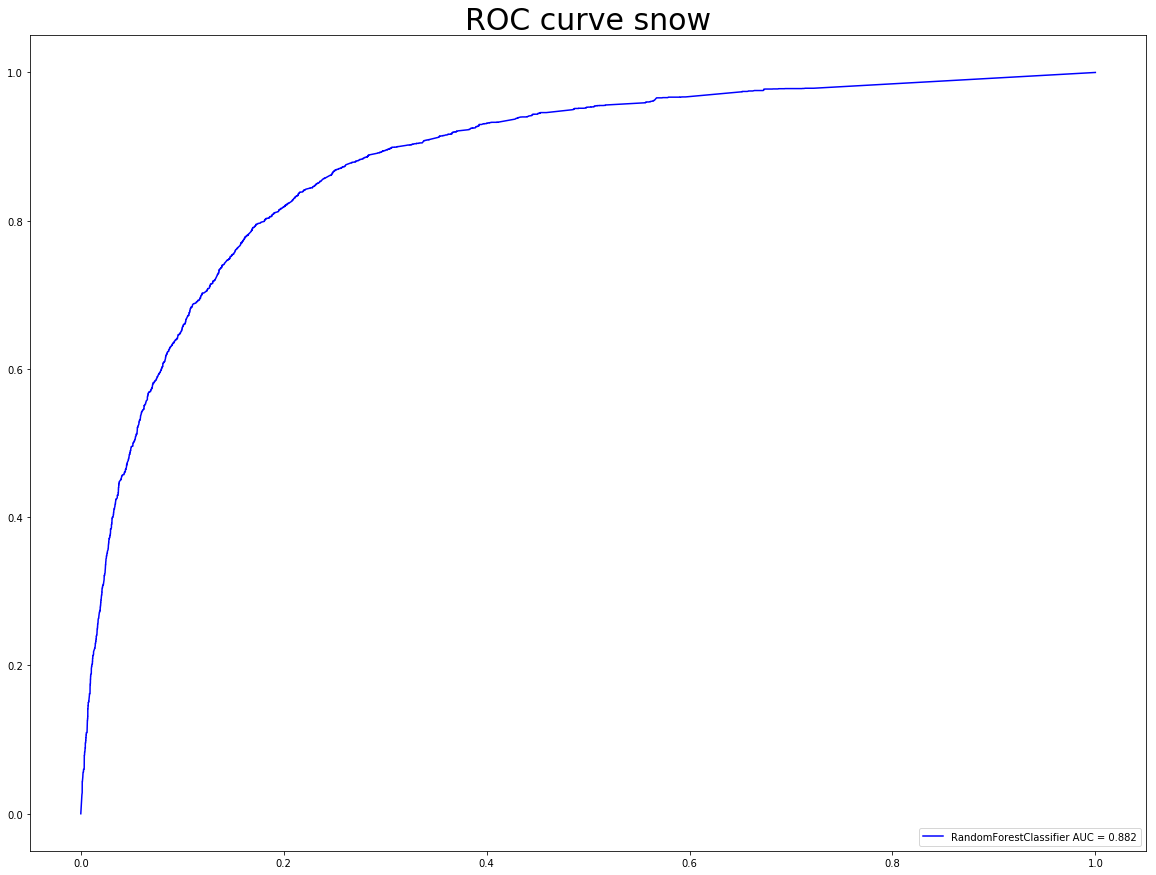

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve snow')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
snow_y_test = test['condition|snow']
snow_y_train = train['condition|snow']      
snowm = RandomForestClassifier(n_estimators=50, max_depth=25)
snowm.fit(new_train, snow_y_train)
plot_roc(snowm,new_test, snow_y_test,'blue')



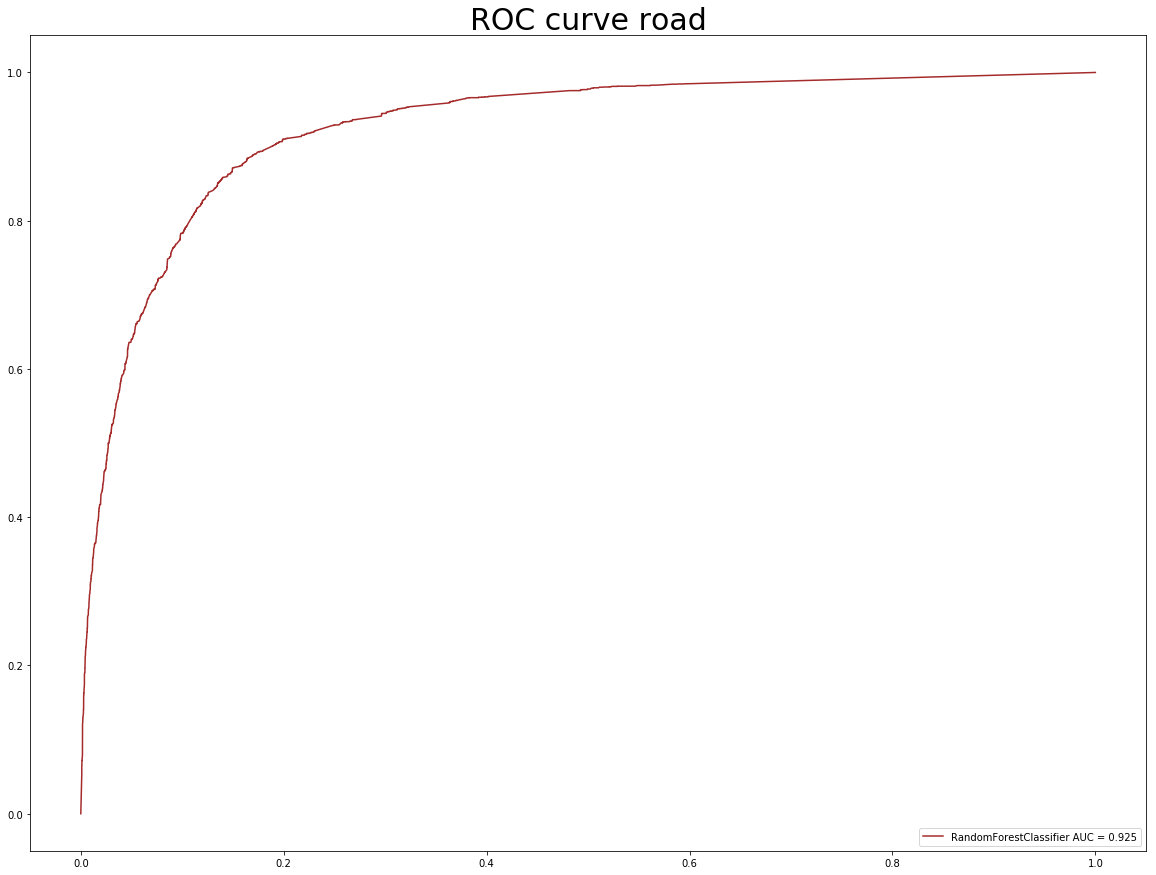

In [22]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve road')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
road_y_test = test['condition|road']
road_y_train = train['condition|road']      
roadm = RandomForestClassifier(n_estimators=50, max_depth=25)
roadm.fit(new_train, road_y_train)
plot_roc(roadm,new_test, road_y_test,'brown')


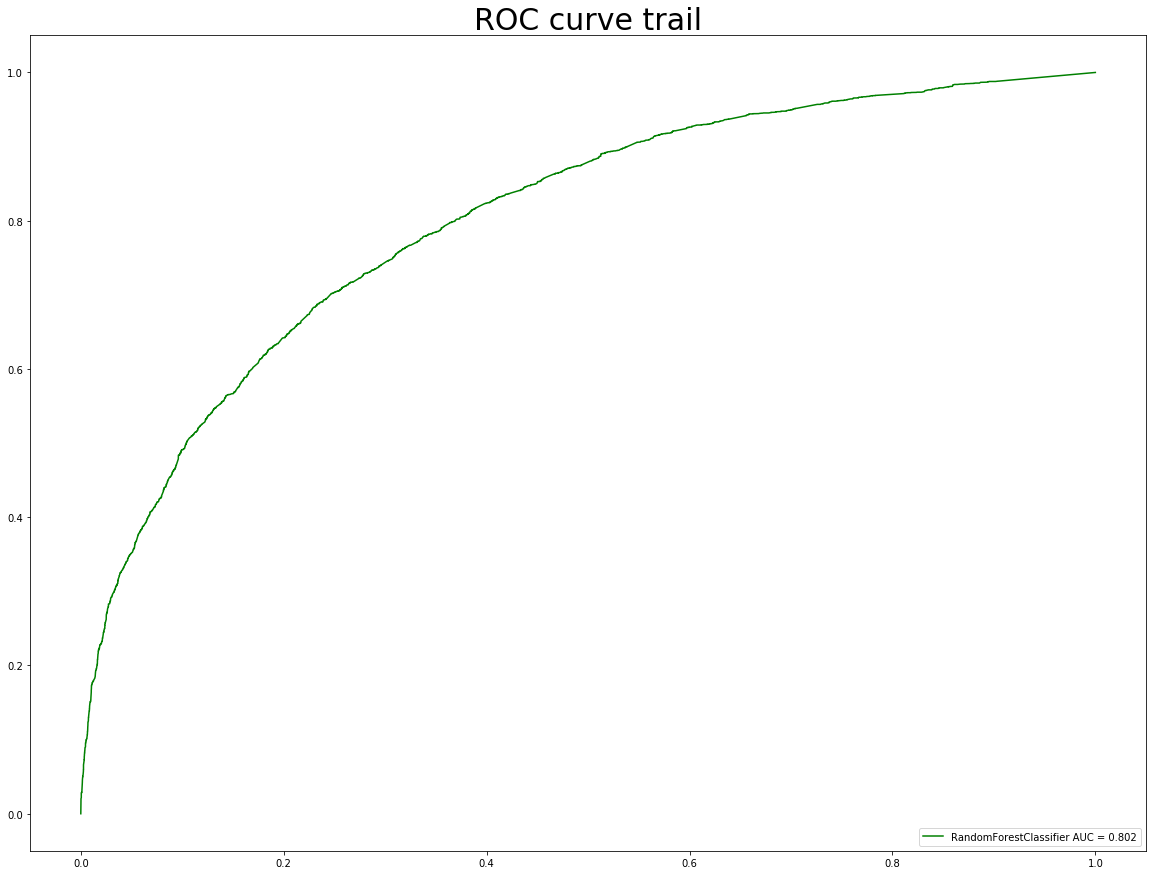

In [23]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve trail')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)

trail_y_test = test['condition|trail']
trail_y_train = train['condition|trail']      
trailm = RandomForestClassifier(n_estimators=50, max_depth=25)
trailm.fit(new_train, trail_y_train)
plot_roc(trailm,new_test, trail_y_test,'green')


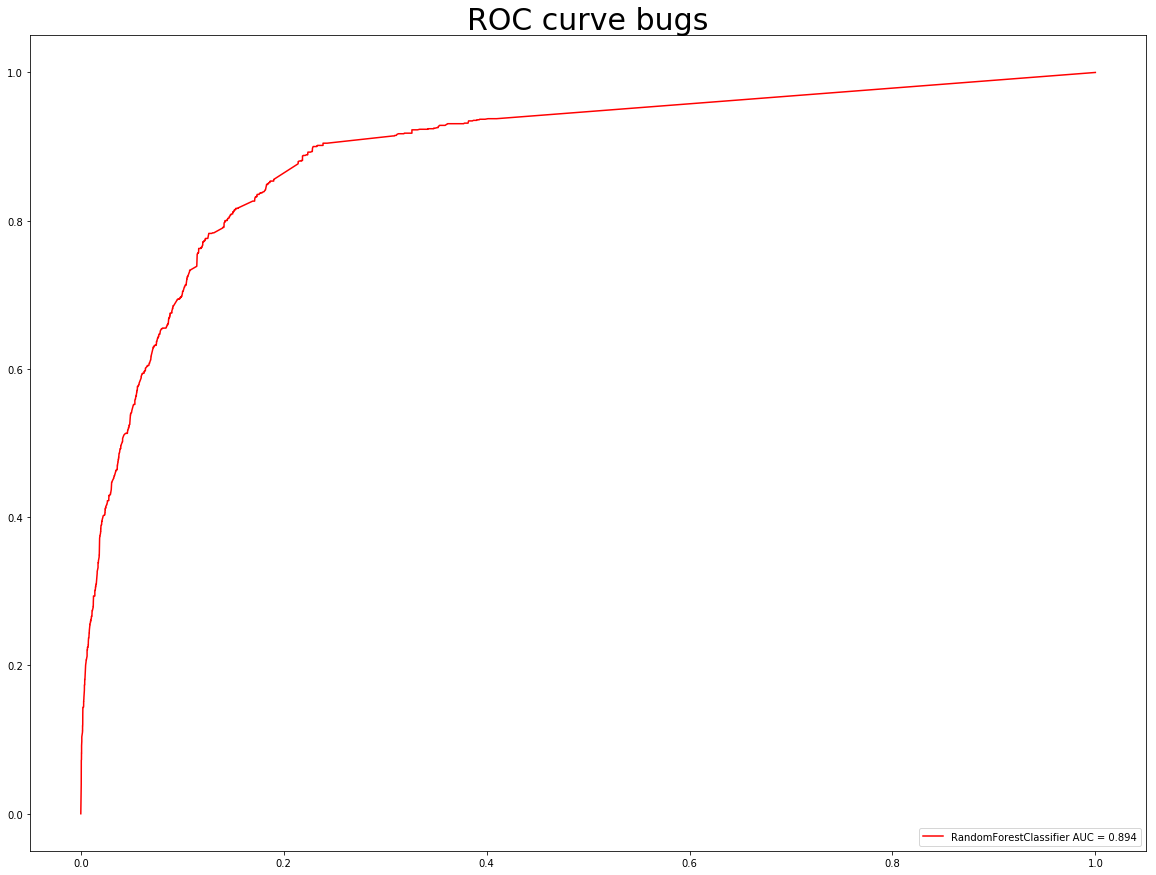

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve bugs')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)

bugs_y_test = test['condition|bugs']
bugs_y_train = train['condition|bugs']      
bugsm = RandomForestClassifier(n_estimators=50, max_depth=25)
bugsm.fit(new_train, bugs_y_train)
plot_roc(bugsm,new_test, bugs_y_test,'red')

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
plot_roc(rf20_model,X_test, y_test,'pink')

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve snow')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
y_test = test['condition|snow']
y_train = train['condition|snow']    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=50, max_depth=depth)
        name.fit(new_train, y_train)
        plot_roc(name,new_test, y_test,color)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve trails')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
y_test = test['condition|trail']
y_train = train['condition|trail']    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=50, max_depth=depth)
        name.fit(new_train, y_train)
        plot_roc(name,new_test, y_test,color)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve roads')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
y_test = test['condition|road']
y_train = train['condition|road']    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=50, max_depth=depth)
        name.fit(X_train, y_train)
        plot_roc(name,X_test, y_test,color)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve bugs')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)
    
colors = ['pink','blue','green','yellow','purple','orange','black','aqua']
depths = [5,10,15,20,25,30,35,40]
names = ['one','two','three','four','five','siz','seven','eight']
for depth,color,name in zip(depths,colors,names):
        name = RandomForestClassifier(n_estimators=500, max_depth=depth)
        name.fit(X_train, y_train)
        plot_roc(name,X_test, y_test,color)

In [18]:
def plot_roc(model, x_columns, y_true,color):

    y_pred = model.predict_proba(x_columns)

    fpr, tpr, threshold = roc_curve(y_true, y_pred[:,1])
    area_under_curve = auc(fpr, tpr)

    # method I: plt
    model_name = str(type(model)).split(".")[-1].strip(">\'")
    ax.plot(fpr, tpr, 'k', label = f'{model_name} AUC = %0.3f' % area_under_curve, color = color)
    ax.legend(loc = 'lower right')

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier(n_estimators=100)
ab_model.fit(X_train, y_train)

kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('ROC curve')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(30)

models = [rf_model, gb_model, lr_model, dt_model, ab_model, kn_model]
colors = ['pink','blue','green','yellow','purple','orange']
for model,color in zip(models,colors):
    plot_roc(model, X_test, y_test,color)

ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:

conditions = ['condition|snow','condition|trail','condition|bugs','condition|road']
for condition in conditions:
    test_y = test[condition]
    train_y = train[condition]
    model = RandomForestClassifier(n_estimators=500,max_depth = 5)
    model.fit(X_train, y_train)
    y_pred = rf_model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(test_y, y_pred[:,1])
    area_under_curve = auc(fpr, tpr)
    print(model,area_under_curve)


In [ ]:
forest_probs = rf_model.predict_proba(X_test)[:,1]
log_probs = lr_model.predict_proba(X_test)[:,1]

In [ ]:
df_names = pd.read_csv('data/new_olympics_merged.csv', sep = '|',lineterminator='\n')

In [ ]:
df_probs = pd.DataFrame({'actual': y_test, 'prob of True forest': forest_probs, 'prob of True log': log_probs,'Date': test['Date'], 'Trail': test['Trail']})

In [ ]:
df_probs

In [ ]:
df_X_test = pd.read_csv('data/X_test_testit.csv', sep = '|')

In [ ]:
df_X_test

In [ ]:
log_probs.shape

In [ ]:
X_test.shape

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='ash.hudd', api_key='VNZP7zrrJqe5xLozigE7')

In [ ]:
p1 = go.Scatter(x=X_train.as_matrix().ravel(), y=y_train, 
                mode='markers',
                marker=dict(color='black'),
                showlegend=False
               )
X_test_rnd = np.linspace(-5, 10, 62)

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test_rnd * lr_model.coef_[0] + lr_model.intercept_).ravel()

p2 = go.Scatter(x=X_test_rnd, y=loss, 
                mode='lines',
                line=dict(color='red', width=3),
                name='Logistic Regression Model')

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

p3 = go.Scatter(x=X_test_rnd, y=ols.coef_ * X_test_rnd + ols.intercept_, 
                mode='lines',
                line=dict(color='blue', width=1),
                name='Linear Regression Model')
p4 = go.Scatter(x=[-4, 10], y=2*[.5],
                mode='lines',
                line=dict(color='gray', width=1),
                showlegend=False
               )

layout = go.Layout(xaxis=dict(title='x', range=[-4, 10],
                              zeroline=False),
                   yaxis=dict(title='y', range=[-0.25, 1.25],
                              zeroline=False))

fig = go.Figure(data=[p1, p2, p4], layout=layout)

In [ ]:
py.iplot(fig)

In [ ]:
list(zip(X_test.columns,lr_model.coef_[0]))

In [ ]:
        rf_20 = RandomForestClassifier(n_estimators=500, max_depth=20)
        rf_20.fit(X_train, y_train)

In [ ]:
feature_values = {}
for i in range(len(lr_model.coef_[0])):
   feature_values[X_test.columns[i]] = lr_model.coef_[0][i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

In [ ]:
feature_values = {}
for i in range(len(rf_20.feature_importances_)):
   feature_values[X_test.columns[i]] = rf_20.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

In [ ]:
lowest_features_bugs = [('DP10', 0.0047398998805421311), ('TAVG', 0.0044893990755030559), ('Waterfalls', 0.0044698355955410723), ('Northwest Forest Pass', 0.0043971258374332235), ('Mountain views', 0.0043271731385251689), ('DX32', 0.0038209744234343505), ('Dogs not allowed', 0.0036938812663791626), ('EMNT', 0.0035909309161276863), ('None', 0.0034425889521208404), ('FZF7', 0.0034226270010774343), ('FZF2', 0.0033834750733235286), ('DT32', 0.0032772239036140353), ('HTDD', 0.003259519125012766), ('HDSD', 0.0032308803358225462), ('DX90', 0.003123963082529514), ('EMXT', 0.0029704712963945982), ('FZF4', 0.0028403894152250683), ('FZF6', 0.0027250342290182821), ('National Park Pass', 0.0025793558652250264), ('FZF9', 0.0024846082932493802), ('FZF3', 0.002416586578980859), (' Goat Rocks', 0.0022704222880186851), ('FZF0', 0.0020468132211241426), (' NW - Carbon River/Mowich', 0.0019974824370823673), ('FZF5', 0.0019678692596892737), ('FZF1', 0.0019623483175150334), ('FZF8', 0.0019461981492195481), (' Snoqualmie Pass', 0.0019411089597948968), (' Salmon La Sac/Teanaway', 0.001829775489423533), (' Chinook Pass - Hwy 410', 0.0018232731333819462), (' NE - Sunrise/White River', 0.0018186401089882516), ('Discover Pass', 0.0017465826020888655), (' White Pass/Cowlitz River Valley', 0.0015397530224656355), ('NaN', 0.0014232189005755362), (' Stevens Pass - East', 0.0012822463528573932), (' Mountain Loop Highway', 0.0011224682411882416), (' SW - Longmire/Paradise', 0.0010910020873136574), (' North Bend Area', 0.0010748878108981634), (' Stevens Pass - West', 0.0010161464308914476), (' North Cascades Highway - Hwy 20', 0.00097519988972889391), (' Hood Canal', 0.00086650698789985531), (' Mount Baker Area', 0.00078417779501493339), ('Wilderness permit. Self-issue at trailhead (no fee)', 0.00073559558934652061), (" SE - Cayuse Pass/Steven's Canyon", 0.00065446369967272924), (' Mount St. Helens', 0.00060143435075972061), (' Northern Coast', 0.00054701309822189704), (' Leavenworth Area', 0.00053572749337168525), (' Mount Adams Area', 0.00048804112296216404), (' Seattle-Tacoma Area', 0.00047036451497627671), ('Coast', 0.00046675514380643487), (' Lewis River Region', 0.00042293078301254127), (' Okanogan Highlands/Kettle River Range', 0.0004177357051762604), (' Methow/Sawtooth', 0.00039950339597791918), ('WDF5', 0.00034439108996360139), (' Dark Divide', 0.00033947135891307687), (' Columbia River Gorge - WA', 0.00033626600151786667), ('WSF2', 0.00031739669603251619), (' Olympia', 0.00031370600517855569), ('WSF5', 0.00030808586336572433), ('WDF2', 0.00030054459592017521), (' Pacific Coast', 0.00026367553109200127), (' Grand Coulee', 0.00022729440472100848), ('AWND', 0.00022726865510600219), (' Wenatchee', 0.00022715974964903981), (' Columbia River Gorge - OR', 0.00021324950558368287), (' Bellingham Area', 0.00019183833163075625), ('None, Northwest Forest Pass', 0.00018746435653190465), ('Sno-Parks Permit', 0.0001869350860925607), (" Spokane Area/Coeur d'Alene", 0.00018313500005196691), (' Pasayten', 0.00017683178358179937), (' Yakima', 0.00016499670471489323), (' Entiat Mountains/Lake Chelan', 0.00013519244401121185), (' Tiger Mountain', 0.00013514366975456689), (' Long Beach Area', 0.00013380387266532969), ('Discover Pass, Sno-Parks Permit', 9.0700099881967832e-05), (' Kitsap Peninsula', 8.6590648705174589e-05), ('National Monument Fee', 8.1711699509629993e-05), (' Cougar Mountain', 7.5921846717506419e-05), (' Tri-Cities', 6.6483962772380964e-05), ('Refuge Entrance Pass', 6.2252483956387836e-05), (' Blewett Pass', 6.1062762801431265e-05), (' Potholes Region', 4.5238296662988347e-05), (' Whidbey Island', 4.5188305095313036e-05), (' Selkirk Range', 3.3864312390993119e-05), (' Palouse and Blue Mountains', 2.6356708216268572e-05), (' San Juan Islands', 1.2187653579183974e-05), (' Squak Mountain', 7.527222774984666e-06), (' Vancouver Area', 3.5098569496802166e-06), ('Oregon State Parks Day-Use', 3.4335311079164381e-06), (' Cle Elum Area', 1.2761896338765058e-06), (' Orcas Island', 2.0853624847318776e-08), ('National Monument Fee, Sno-Parks Permit', 5.1364331549378915e-09), ('Fall foilage', 0.0), ('Backcountry camping permit. Register in person at ranger station (no fee)', 0.0), ('Northwest Forest Pass, Sno-Parks Permit', 0.0), ('PSUN', 0.0), ('WDMV', 0.0)]


In [ ]:
lowest_feat_roads = [('Good for kids', 0.0049992606816247178), ('Wildflowers/Meadows', 0.0049283127485383518), ('Rivers', 0.0048726428797377444), ('Ridges/passes', 0.0048700305504250571), ('Lakes', 0.0047652602867344733), ('HDSD', 0.0046964469700070104), ('Established campsites', 0.0046555168688451731), ('EMXT', 0.004495941382268916), ('Dogs not allowed', 0.0044090711021285214), ('FZF6', 0.0042059275581067508), ('DX90', 0.0040644057457769802), ('Waterfalls', 0.0040559384050187636), ('None', 0.0039783303548555507), ('Mountain views', 0.0039145693245903343), ('FZF4', 0.0038151276161146465), ('FZF8', 0.0036088989654583831), ('FZF3', 0.0034082432657123172), ('Discover Pass', 0.0033013472323388917), ('FZF1', 0.003098997627021888), (' Snoqualmie Pass', 0.0030729947637374907), ('FZF5', 0.0029099518512138811), ('FZF0', 0.002848166742020358), ('National Park Pass', 0.00269342766207545), (' Salmon La Sac/Teanaway', 0.0025769202403078399), (' White Pass/Cowlitz River Valley', 0.002146180212545827), (' Mountain Loop Highway', 0.0018917183826275138), (' Hood Canal', 0.0015520791889559206), (' North Bend Area', 0.0015202484526654644), (' Chinook Pass - Hwy 410', 0.0013896261887994038), ('NaN', 0.0013442734987101567), (' NE - Sunrise/White River', 0.0013438669836293563), (' Dark Divide', 0.0011919368110455682), (' North Cascades Highway - Hwy 20', 0.00098304775574666438), (' Mount Adams Area', 0.00090675076410272793), (' Stevens Pass - West', 0.00082855074591198891), (' Mount St. Helens', 0.00076202992865813976), (' Mount Baker Area', 0.00072107254839286249), (' SW - Longmire/Paradise', 0.00070412916346365402), ('Sno-Parks Permit', 0.00070404015536100018), (' Leavenworth Area', 0.00064810598617346424), (' Lewis River Region', 0.00064718799557091241), ('Coast', 0.00064286709166851705), (' Stevens Pass - East', 0.00052075696976488237), ('WDF5', 0.0004391926570980925), ('WSF2', 0.00042397830527158995), (' Goat Rocks', 0.00041673296952550578), ('WSF5', 0.00041359583115535738), (' Northern Coast', 0.00040888304047629204), ('WDF2', 0.00040872612231811916), (' Yakima', 0.0003990189479277696), ('AWND', 0.00038041184665660489), (' Palouse and Blue Mountains', 0.0003503119407585376), (" SE - Cayuse Pass/Steven's Canyon", 0.00030949924627468589), (' Seattle-Tacoma Area', 0.00030469754768330039), (' Pasayten', 0.00029149309337028946), (' Columbia River Gorge - WA', 0.00027967250864600071), (' Wenatchee', 0.00024074161893326975), ('Wilderness permit. Self-issue at trailhead (no fee)', 0.00021747078589497802), (' Methow/Sawtooth', 0.00021374881573145308), (' Blewett Pass', 0.00019491981367005529), (' Bellingham Area', 0.00017722869102573534), (' Pacific Coast', 0.0001756015888404358), (' Olympia', 0.00016530911279914658), (" Spokane Area/Coeur d'Alene", 0.00013017221111783891), (' Columbia River Gorge - OR', 0.00010431074979429723), (' Tiger Mountain', 8.9213246687527137e-05), (' Entiat Mountains/Lake Chelan', 7.5238480659122733e-05), ('None, Northwest Forest Pass', 5.3736632327256184e-05), (' Selkirk Range', 4.8013771756785834e-05), (' San Juan Islands', 4.5894302687162164e-05), (' Okanogan Highlands/Kettle River Range', 4.5630082785596482e-05), ('National Monument Fee', 4.4595488765660271e-05), (' Cougar Mountain', 4.3682313948504827e-05), (' Tri-Cities', 3.0560295999050505e-05), (' Kitsap Peninsula', 2.4142142189403972e-05), (' Grand Coulee', 1.8809629981731843e-05), ('Discover Pass, Sno-Parks Permit', 1.7554402017043914e-05), (' Potholes Region', 1.4420504843646568e-05), (' Squak Mountain', 1.1649255176952475e-05), ('Refuge Entrance Pass', 1.1475155182141662e-05), (' Whidbey Island', 6.8067198402184426e-06), (' Long Beach Area', 6.2014306643620709e-06), (' Vancouver Area', 1.7315486168250455e-06), ('Oregon State Parks Day-Use', 1.4994902585813325e-06), ('National Monument Fee, Sno-Parks Permit', 1.2307075144417733e-06), (' Cle Elum Area', 7.6195885092188968e-07), (' Orcas Island', 4.1624545305802102e-08), ('Fall foilage', 0.0), ('Backcountry camping permit. Register in person at ranger station (no fee)', 0.0), ('Northwest Forest Pass, Sno-Parks Permit', 0.0), ('PSUN', 0.0), ('WDMV', 0.0)]

In [ ]:
lowest_feat_trails = [' Yakima', 0.00045697165299073643), ('WDF2', 0.000436492066903684), (" SE - Cayuse Pass/Steven's Canyon", 0.0004301398521850639), (' Columbia River Gorge - WA', 0.00041967590851514657), ('Sno-Parks Permit', 0.0004159143661448476), ('WDF5', 0.00037026813368976064), ('WSF5', 0.00036791260645290273), ('WSF2', 0.00035851450276173355), (' Goat Rocks', 0.00031258292428043626), ('AWND', 0.00030618639548079521), (' Tiger Mountain', 0.00029051846248930697), (' Mount Adams Area', 0.00025921025126614955), (' Methow/Sawtooth', 0.00023945359785117876), (' Palouse and Blue Mountains', 0.00020373873594133144), (' Long Beach Area', 0.00019596580232456032), (' Cougar Mountain', 0.00018532330934546305), (' Blewett Pass', 0.00017284266751353653), (' Pasayten', 0.00016899236110611931), (' Columbia River Gorge - OR', 0.00016201470599847164), (' Entiat Mountains/Lake Chelan', 0.0001618309578017431), ('Refuge Entrance Pass', 0.00015190377083119466), (' Whidbey Island', 0.00013932240291269818), (" Spokane Area/Coeur d'Alene", 0.00013700575544854687), (' Kitsap Peninsula', 0.0001261978560115798), (' Grand Coulee', 0.00012420962669848037), (' Squak Mountain', 0.00012377670731468894), ('Wilderness permit. Self-issue at trailhead (no fee)', 0.00011697425934456733), (' Wenatchee', 9.0603212442836028e-05), (' Okanogan Highlands/Kettle River Range', 8.3015091058930243e-05), ('National Monument Fee', 8.1224648256638453e-05), (' Selkirk Range', 5.4717285699130767e-05), (' San Juan Islands', 4.5056120027112507e-05), (' Tri-Cities', 4.0933502554926062e-05), (' Potholes Region', 3.0849649535730813e-05), ('Discover Pass, Sno-Parks Permit', 2.5135837980221467e-05), (' Vancouver Area', 2.2724402255814444e-05), ('None, Northwest Forest Pass', 1.5380110505611787e-05), ('Oregon State Parks Day-Use', 8.7128571904971931e-06), (' Cle Elum Area', 3.0912810349619401e-06), ('National Monument Fee, Sno-Parks Permit', 1.6901247843131123e-06), (' Orcas Island', 9.9777895286100167e-07), ('Fall foilage', 0.0), ('Backcountry camping permit. Register in person at ranger station (no fee)', 0.0), ('Northwest Forest Pass, Sno-Parks Permit', 0.0), ('PSUN', 0.0), ('WDMV', 0.0)]

In [ ]:
lowest_feat_snow = [('FZF7', 0.0048934618066659953), ('Summits', 0.0047837693676085272), ('DX90', 0.0047518077585996087), ('Northwest Forest Pass', 0.0047510599745229764), ('FZF9', 0.0047254187552693994), ('Lakes', 0.0045915897595401982), ('Wildflowers/Meadows', 0.0044955060436515874), ('Ridges/passes', 0.0044589361516661217), ('FZF4', 0.0042685560556454923), ('Old growth', 0.0040974152520217525), ('Rivers', 0.0040617314454378071), ('Wildlife', 0.0040230950283269822), ('FZF3', 0.0039081440910943583), ('Established campsites', 0.0037504053174881491), (' Snoqualmie Pass', 0.0037143657636832901), ('Waterfalls', 0.00349459017174854), ('FZF1', 0.0033806727491146001), ('FZF8', 0.0032131923502708788), ('FZF6', 0.0031220462937169278), ('None', 0.002921683254859541), ('Sno-Parks Permit', 0.0028400909606250274), ('Dogs not allowed', 0.0027134087822770097), ('FZF0', 0.0026429105857689881), ('FZF5', 0.0024011467318537415), ('National Park Pass', 0.0022418799539950475), ('Discover Pass', 0.0017918956104985605), ('NaN', 0.0016643074871779224), (' North Bend Area', 0.0015937626057762676), (' Salmon La Sac/Teanaway', 0.0014380532253830966), ('Coast', 0.0012928582436465249), (' Chinook Pass - Hwy 410', 0.0012792537719728378), (' SW - Longmire/Paradise', 0.001172738259889625), (' Mountain Loop Highway', 0.0011052002226039099), (' Hood Canal', 0.0010845316436358231), (' NE - Sunrise/White River', 0.0010095843100038943), (' Mount Baker Area', 0.00097513247393748602), (' Stevens Pass - West', 0.00094561257297770215), (' NW - Carbon River/Mowich', 0.0008541574302760789), (' Stevens Pass - East', 0.00078160232490817085), (' North Cascades Highway - Hwy 20', 0.00075960885100854493), (" SE - Cayuse Pass/Steven's Canyon", 0.00066241605135632597), (' Mount Adams Area', 0.00061097772589605774), (' Leavenworth Area', 0.00050478840622641692), (' Mount St. Helens', 0.0004882357878385759), (' Northern Coast', 0.00047158497807717447), (' White Pass/Cowlitz River Valley', 0.00044172047608534009), ('WSF5', 0.00038315453321075086), ('WDF5', 0.00038024305834138868), ('WDF2', 0.00034662650027722074), (' Goat Rocks', 0.00034549496228905357), ('WSF2', 0.00033328646501425282), ('AWND', 0.00031365354556093746), (' Yakima', 0.00030162928394995869), (' Seattle-Tacoma Area', 0.00025912272734930598), (' Columbia River Gorge - WA', 0.0002060781854927138), (' Blewett Pass', 0.00020272245421468424), (' Pacific Coast', 0.00019235115892520522), (' Methow/Sawtooth', 0.00016202042748682317), (' Olympia', 0.00014369629648978668), (' Lewis River Region', 0.00014185049993099813), (' Tiger Mountain', 0.00013572679124939499), (' Bellingham Area', 0.00013338314495821882), (' Entiat Mountains/Lake Chelan', 0.00012819984955418032), (' Pasayten', 0.00012678168034519161), (" Spokane Area/Coeur d'Alene", 9.8266947577501705e-05), (' Dark Divide', 8.7007257986752569e-05), (' Columbia River Gorge - OR', 8.3613976747292043e-05), ('Wilderness permit. Self-issue at trailhead (no fee)', 8.1314012810892701e-05), (' Wenatchee', 6.6835383148962393e-05), ('National Monument Fee', 5.6539379223555297e-05), ('Discover Pass, Sno-Parks Permit', 4.7438528118373227e-05), (' Okanogan Highlands/Kettle River Range', 4.7164749867195808e-05), ('National Monument Fee, Sno-Parks Permit', 4.1658315114085135e-05), (' Palouse and Blue Mountains', 3.743004621988078e-05), (' Selkirk Range', 3.6766756963501971e-05), (' Cougar Mountain', 3.2915886004768412e-05), (' Squak Mountain', 2.9070722493666458e-05), (' Tri-Cities', 1.8215933708484137e-05), (' Kitsap Peninsula', 1.7767627647980333e-05), (' Grand Coulee', 1.5990042620293055e-05), ('None, Northwest Forest Pass', 1.5977058143090673e-05), ('Refuge Entrance Pass', 1.4600535772782853e-05), (' Potholes Region', 1.3617880819734838e-05), (' Cle Elum Area', 6.689357790499477e-06), (' Whidbey Island', 4.6287589393954567e-06), (' San Juan Islands', 5.6460386822351496e-07), (' Long Beach Area', 4.7687510230310813e-07), (' Vancouver Area', 3.3967212173486698e-07), ('Oregon State Parks Day-Use', 1.1373328848094674e-08), (' Orcas Island', 1.7987811794139404e-09), ('Fall foilage', 0.0), ('Backcountry camping permit. Register in person at ranger station (no fee)', 0.0), ('Northwest Forest Pass, Sno-Parks Permit', 0.0), ('PSUN', 0.0), ('WDMV', 0.0)]

In [ ]:
bug_feat = [feat for feat,val in lowest_features_bugs]
road_feat = [feat for feat,val in lowest_feat_roads]
trail_feat = [feat for feat,val in lowest_feat_trails]
snow_feat = [feat for feat,val in lowest_feat_snow]

In [ ]:
bottom_feat = []
for feat in snow_feat:
    if feat in trail_feat:
        if feat in road_feat:
            if feat in bug_feat:
                bottom_feat.append(feat)
print (bottom_feat)

In [ ]:
conditions = ['condition|snow','condition|trail','condition|bugs','condition|road']
for condition in conditions:
    y_train = train[condition]
    rf_20 = RandomForestClassifier(n_estimators=500, max_depth=20)
    rf_20.fit(X_train, y_train)
    feature_values = {}
    for i in range(len(rf_20.feature_importances_)):
       feature_values[X_test.columns[i]] = rf_20.feature_importances_[i]

    top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
    print(condition)
    print(top_features)

In [15]:
drop_feats = ['DX90', 'FZF4', 'FZF3', ' Snoqualmie Pass', 'Waterfalls', 'FZF1', 'FZF8', 'FZF6', 'None', 'Sno-Parks Permit', 'Dogs not allowed', 'FZF0', 'FZF5', 'National Park Pass', 'Discover Pass', 'NaN', ' North Bend Area', ' Salmon La Sac/Teanaway', 'Coast', ' Chinook Pass - Hwy 410', ' SW - Longmire/Paradise', ' Mountain Loop Highway', ' Hood Canal', ' NE - Sunrise/White River', ' Mount Baker Area', ' Stevens Pass - West', ' Stevens Pass - East', ' North Cascades Highway - Hwy 20', " SE - Cayuse Pass/Steven's Canyon", ' Mount Adams Area', ' Leavenworth Area', ' Mount St. Helens', ' Northern Coast', ' White Pass/Cowlitz River Valley', 'WSF5', 'WDF5', 'WDF2', ' Goat Rocks', 'WSF2', 'AWND', ' Yakima', ' Seattle-Tacoma Area', ' Columbia River Gorge - WA', ' Blewett Pass', ' Pacific Coast', ' Methow/Sawtooth', ' Olympia', ' Lewis River Region', ' Tiger Mountain', ' Bellingham Area', ' Entiat Mountains/Lake Chelan', ' Pasayten', " Spokane Area/Coeur d'Alene", ' Dark Divide', ' Columbia River Gorge - OR', 'Wilderness permit. Self-issue at trailhead (no fee)', ' Wenatchee', 'National Monument Fee', 'Discover Pass, Sno-Parks Permit', ' Okanogan Highlands/Kettle River Range', 'National Monument Fee, Sno-Parks Permit', ' Palouse and Blue Mountains', ' Selkirk Range', ' Cougar Mountain', ' Squak Mountain', ' Tri-Cities', ' Kitsap Peninsula', ' Grand Coulee', 'None, Northwest Forest Pass', 'Refuge Entrance Pass', ' Potholes Region', ' Cle Elum Area', ' Whidbey Island', ' San Juan Islands', ' Long Beach Area', ' Vancouver Area', 'Oregon State Parks Day-Use', ' Orcas Island', 'Fall foilage', 'Backcountry camping permit. Register in person at ranger station (no fee)', 'Northwest Forest Pass, Sno-Parks Permit', 'PSUN', 'WDMV']

In [16]:
new_test = test_X.drop(drop_feats,axis=1)
new_train = train_X.drop(drop_feats,axis=1)

In [ ]:
new_test.shape, new_train.shape

In [ ]:
test_y.shape

In [ ]:
train_y.shape

In [ ]:
rf20_model = RandomForestClassifier(n_estimators=500, max_depth=20)
rf20_model.fit(new_train, y_train)

In [ ]:
conditions = ['condition|snow','condition|trail','condition|bugs','condition|road']
for condition in conditions:
    test_y = test[condition]
    train_y = train[condition]
    model = RandomForestClassifier(n_estimators=500,max_depth = 20)
    model.fit(new_train, y_train)
    y_pred = model.predict_proba(new_test)
    fpr, tpr, threshold = roc_curve(test_y, y_pred[:,1])
    area_under_curve = auc(fpr, tpr)
    print(condition,area_under_curve)

In [ ]:
    test_y = test['condition|snow']
    train_y = train['condition|snow']
    model_snow2 = RandomForestClassifier(n_estimators=50,max_depth = 20)
    model_snow2.fit(new_train, y_train)
    y_pred = model_snow.predict_proba(new_test)
    fpr, tpr, threshold = roc_curve(test_y, y_pred[:,1])
    area_under_curve = auc(fpr, tpr)
    print(condition,area_under_curve)

In [ ]:

conditions = ['condition|snow','condition|trail','condition|bugs','condition|road']
for condition in conditions:
    test_y = test[condition]
    train_y = train[condition]
    for est in range(50,500,50):
        model = RandomForestClassifier(n_estimators=est,max_depth = 30)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)
        fpr, tpr, threshold = roc_curve(test_y, y_pred[:,1])
        area_under_curve = auc(fpr, tpr)
        print(condition,est,area_under_curve)

Input final x and y and try making predictions on x_test data from the split

In [ ]:
dates = X_train['Date'].apply(lambda x: pd.to_datetime(x))

In [ ]:
dates_ordered = dates.apply(lambda x: x.month*30 + x.day *(2*math.pi))

In [ ]:
dates_sin = dates_ordered.apply(lambda x: math.sin(x))

In [ ]:
dates_cos = dates_ordered.apply(lambda x: math.cos(x))

In [ ]:
def dates_in_circle(dates):
    dates_ordered = dates.apply(lambda x: x.month*30 + x.day *(2*math.pi))
    dates_sin = dates_ordered.apply(lambda x: math.sin(x))
    dates_cos = dates_ordered.apply(lambda x: math.cos(x))
    return dates_sin, dates_cos

In [ ]:
X_train['sin'], X_train['cos'] = dates_in_circle(dates)